### Loading libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

### Importing data

In [4]:
Q1_2021 = pd.read_csv('Q1_2021 (1).csv')
Q2_2021 = pd.read_csv('Q2_2021 (1).csv')

### Data Shape Exploration

In [5]:
Q1_2021.head()

,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
0,31/03/2021 00:00,995439,1522,20,09/03/2021 00:00,30/03/2021 00:00,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,"$9,561.05","$4,113.27","$5,447.78",0.57,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$9,561.05",$0.00,"$4,113.27","$5,258.62",$0.00,"$3,223.98","$14,819.67","$7,337.25",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
1,31/03/2021 00:00,995440,1522,20,09/03/2021 00:00,30/03/2021 00:00,114227,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60222,"$14,753.10","$5,880.56","$8,872.54",0.60,1,$51.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$14,702.10",$0.00,"$5,880.56",$0.00,$0.00,$0.00,"$14,753.10","$5,880.56",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
2,31/03/2021 00:00,571394,1521,11,NaN,01/03/2021 00:00,5847,SERVICIO,INTERNA,INTERNO,59741,"-$1,711.21","-$1,711.21",$0.00,0.00,-1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"-$1,711.21",$0.00,"-$1,711.21",$0.00,$0.00,$0.00,"-$1,711.21","-$1,711.21",60004,9BD578456GB074512,2016,M,NaN,BLANCOS,NaN
3,31/03/2021 00:00,995441,1522,20,09/03/2021 00:00,01/04/2021 00:00,53848,SERVICIO,INTERNA,INTERNO,59935,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,4514,3G1MA5E21ML130621,0,G,NaN,NaN,22.0
4,31/03/2021 00:00,995442,1522,20,13/03/2021 00:00,14/04/2021 00:00,114194,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60405,"$6,512.89","$2,522.00","$3,990.89",0.61,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$6,512.89",$0.00,"$2,522.00","$21,287.43",$0.00,"$17,622.71","$27,800.32","$20,144.71",21456,MA6CB5CD8LT055964,0,G,NaN,NaN,18.0


In [6]:
print(f'Amount of rows and columns first quarter => {Q1_2021.shape}')
print(f'Amount of rows and columns second quarter => {Q2_2021.shape}')

Amount of rows and columns first quarter => (60061, 37)
Amount of rows and columns second quarter => (60197, 37)


> Both datasets have the same amount of columns, and almost the same a mount os rows(orders)

### Adding trimestre para hacer una sola base de datos

In [7]:
Q1_2021.insert(0, 'QPR', 'Q1')
Q2_2021.insert(0, 'QPR', 'Q2')

In [8]:
# Unir las dos dataframes 
df = pd.concat([Q1_2021, Q2_2021], axis=0)

In [9]:
df.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
0,Q1,31/03/2021 00:00,995439,1522,20,09/03/2021 00:00,30/03/2021 00:00,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,"$9,561.05","$4,113.27","$5,447.78",0.57,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$9,561.05",$0.00,"$4,113.27","$5,258.62",$0.00,"$3,223.98","$14,819.67","$7,337.25",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
1,Q1,31/03/2021 00:00,995440,1522,20,09/03/2021 00:00,30/03/2021 00:00,114227,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60222,"$14,753.10","$5,880.56","$8,872.54",0.60,1,$51.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$14,702.10",$0.00,"$5,880.56",$0.00,$0.00,$0.00,"$14,753.10","$5,880.56",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
2,Q1,31/03/2021 00:00,571394,1521,11,NaN,01/03/2021 00:00,5847,SERVICIO,INTERNA,INTERNO,59741,"-$1,711.21","-$1,711.21",$0.00,0.00,-1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"-$1,711.21",$0.00,"-$1,711.21",$0.00,$0.00,$0.00,"-$1,711.21","-$1,711.21",60004,9BD578456GB074512,2016,M,NaN,BLANCOS,NaN
3,Q1,31/03/2021 00:00,995441,1522,20,09/03/2021 00:00,01/04/2021 00:00,53848,SERVICIO,INTERNA,INTERNO,59935,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,4514,3G1MA5E21ML130621,0,G,NaN,NaN,22.0
4,Q1,31/03/2021 00:00,995442,1522,20,13/03/2021 00:00,14/04/2021 00:00,114194,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60405,"$6,512.89","$2,522.00","$3,990.89",0.61,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$6,512.89",$0.00,"$2,522.00","$21,287.43",$0.00,"$17,622.71","$27,800.32","$20,144.71",21456,MA6CB5CD8LT055964,0,G,NaN,NaN,18.0


In [10]:
df.tail()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
60192,Q2,04/04/2021 00:00,475901,1521,9,04/04/2021 00:00,05/04/2021 00:00,102698,SERVICIO,PUBLICO,CONTADO,34509,"$3,848.23","$1,275.25","$2,572.98",0.67,1,"$1,105.50",$0.00,$114.39,$147.92,$0.00,$0.00,"$2,594.81",$0.00,"$1,160.86","$1,246.60",$0.00,$787.17,"$5,094.83","$2,062.42",34837,1HGRW1844KL905654,2019,H,NaN,AZUL OBSIDIANA,0.0
60193,Q2,04/04/2021 00:00,475902,1521,9,04/04/2021 00:00,05/04/2021 00:00,102699,SERVICIO,PUBLICO,CONTADO,34497,"$2,294.98",$492.80,"$1,802.18",0.79,1,"$1,244.32",$0.00,$118.94,$145.50,$0.00,$0.00,$905.16,$0.00,$373.86,"$1,523.97",$0.00,$961.89,"$3,818.95","$1,454.69",93670,3HGRM3851EG003846,2014,H,NaN,NaN,0.0
60194,Q2,01/04/2021 00:00,1250885,1522,27,12/02/2021 00:00,18/03/2021 00:00,18430,SERVICIO,INTERNA,INTERNO,36702,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,34686,3N1AB7AD7HL602467,2017,N,NaN,NaN,48.0
60195,Q2,01/04/2021 00:00,1250883,1522,27,14/11/2020 00:00,NaN,18431,HOJALATERIA Y PINTURA,INTERNA,INTERNO,33048,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,2365,3N1CK3CD6JL260434,2018,N,NaN,NaN,138.0
60196,Q2,01/04/2021 00:00,1250884,1522,27,12/02/2021 00:00,18/03/2021 00:00,127,SERVICIO,INTERNA,INTERNO,36702,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"-$1,117.48",$0.00,$0.00,"-$1,117.48",$0.00,34686,3N1AB7AD7HL602467,2017,N,NaN,NaN,48.0


### Some basic EDA

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
QPR,120258,2,Q2,60197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FechaFactura,120258,174,31/03/2021 00:00,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IdRegistro,120258.0,NaN,NaN,NaN,807728.475153,408508.65948,66982.0,473988.25,847069.5,1166583.75,1421942.0
Client,120258.0,NaN,NaN,NaN,1521.114604,0.728915,1520.0,1521.0,1521.0,1522.0,1522.0
Branch,120258.0,NaN,NaN,NaN,17.25595,10.006845,1.0,9.0,18.0,23.0,38.0
FechaApertura,106872,394,19/04/2021 00:00,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FechaEntrega,114339,479,30/04/2021 00:00,1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Factura,120258.0,NaN,NaN,NaN,88072.328444,99756.136714,1.0,20240.0,50042.5,118060.75,336611.0
Taller,120258,4,SERVICIO,108440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TipoOrden,119828,4,PUBLICO,67489,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120258 entries, 0 to 60196
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   QPR                   120258 non-null  object 
 1   FechaFactura          120258 non-null  object 
 2   IdRegistro            120258 non-null  int64  
 3   Client                120258 non-null  int64  
 4   Branch                120258 non-null  int64  
 5   FechaApertura         106872 non-null  object 
 6   FechaEntrega          114339 non-null  object 
 7   Factura               120258 non-null  int64  
 8   Taller                120258 non-null  object 
 9   TipoOrden             119828 non-null  object 
 10  TipoPago              116458 non-null  object 
 11  NumeroOT              120258 non-null  int64  
 12  Venta$                120258 non-null  object 
 13  Costo$                120258 non-null  object 
 14  Utilidad$             120258 non-null  object 
 15  Margen

In [13]:
df.isnull().sum()

QPR                          0
FechaFactura                 0
IdRegistro                   0
Client                       0
Branch                       0
FechaApertura            13386
FechaEntrega              5919
Factura                      0
Taller                       0
TipoOrden                  430
TipoPago                  3800
NumeroOT                     0
Venta$                       0
Costo$                       0
Utilidad$                    0
Margen                       0
VentasNetas                  0
VentaMO$                     0
DescuentoMO$                 0
CostoMO$                     0
VentaMateriales$             0
DescuentoMateriales$         0
CostoMateriales$             0
VentaTOT$                    0
DescuentoTOT$                0
CostoTOT$                    0
VentaPartes$                 0
DescuentoPartes$             0
CostoPartes$                 0
VentaTotal$                  0
CostoTotal$                  0
Odometro                     0
Vin     

### Clean data and data types

#### Necesito cambiar los valores de las columas de pago a floats para analisis 

- Funcion para limpiar valores numericos 

In [14]:
def clean_num_values(df, columns):
    df_temp = df.copy()
    for col in columns:
        df_temp[col] = df_temp[col].str.replace('$', '').str.replace(',', '').astype(float)
        
    return df_temp

In [15]:
columns_to_clean = [col for col in df.columns if '$' in col]  # Getting columns that needs to be clean

In [16]:
columns_to_clean

['Venta$',
 'Costo$',
 'Utilidad$',
 'VentaMO$',
 'DescuentoMO$',
 'CostoMO$',
 'VentaMateriales$',
 'DescuentoMateriales$',
 'CostoMateriales$',
 'VentaTOT$',
 'DescuentoTOT$',
 'CostoTOT$',
 'VentaPartes$',
 'DescuentoPartes$',
 'CostoPartes$',
 'VentaTotal$',
 'CostoTotal$']

In [17]:
df_num_clean = clean_num_values(df, columns_to_clean)

In [18]:
df_num_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120258 entries, 0 to 60196
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   QPR                   120258 non-null  object 
 1   FechaFactura          120258 non-null  object 
 2   IdRegistro            120258 non-null  int64  
 3   Client                120258 non-null  int64  
 4   Branch                120258 non-null  int64  
 5   FechaApertura         106872 non-null  object 
 6   FechaEntrega          114339 non-null  object 
 7   Factura               120258 non-null  int64  
 8   Taller                120258 non-null  object 
 9   TipoOrden             119828 non-null  object 
 10  TipoPago              116458 non-null  object 
 11  NumeroOT              120258 non-null  int64  
 12  Venta$                120258 non-null  float64
 13  Costo$                120258 non-null  float64
 14  Utilidad$             120258 non-null  float64
 15  Margen

#### Convert data time columns

In [19]:
df_num_clean.FechaApertura = pd.to_datetime(df_num_clean.FechaApertura, format='%d/%m/%Y %H:%M')
df_num_clean.FechaFactura = pd.to_datetime(df_num_clean.FechaFactura, format='%d/%m/%Y %H:%M')
df_num_clean.FechaEntrega = pd.to_datetime(df_num_clean.FechaEntrega, format='%d/%m/%Y %H:%M')

#### Convert IdRegistro to category

In [20]:
df_num_clean.IdRegistro = df_num_clean.IdRegistro.astype('category')

In [21]:
df_num_clean[df_num_clean.IdRegistro.duplicated()]

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias


- Cada Id es unico

### Check VIN Column

In [22]:
df_num_clean.Vin.value_counts().sort_values(ascending=False)[:10]

Vin
19UTC2855ML900124    18
KMHC85LC9KU123862    17
3N8CP5HD4JL487564    16
1GKKN8LS1KZ251800    16
3N1CN8AE7LL818522    15
3KPA35AC2JE116164    13
KNDJP3A42J7599057    13
3MX1771871W040284    13
3G1J86CC1GS605484    13
JN8BT27T6KW107957    12
Name: count, dtype: int64

In [23]:
vin_null_fill = df_num_clean[df_num_clean.Vin.isnull()]
df_num_clean[df_num_clean.Vin.isnull()].shape

(301, 38)

In [24]:
vin_null_fill[['FechaFactura', 'IdRegistro', 'Client', 'Branch','Factura', 'Taller', 'TipoOrden','NumeroOT','Odometro', 'Vin']]

,FechaFactura,IdRegistro,Client,Branch,Factura,Taller,TipoOrden,NumeroOT,Odometro,Vin
546,2021-03-31,794177,1521,16,50423,SERVICIO,INTERNA,21414,0,NaN
798,2021-03-31,291346,1521,7,301352,SERVICIO,INTERNA,33469,0,NaN
1112,2021-03-31,1166376,1522,23,10523,SERVICIO,INTERNA,52911,0,NaN
1902,2021-03-30,794128,1521,16,11183,SERVICIO,INTERNA,21192,0,NaN
2184,2021-03-30,681053,1521,12,155627,SERVICIO,PUBLICO,45154,1,NaN
...,...,...,...,...,...,...,...,...,...,...
55420,2021-04-12,847534,1521,18,56114,SERVICIO,INTERNA,22858,1,NaN
55497,2021-04-12,1318956,1520,34,54064,HOJALATERIA Y PINTURA,INTERNA,41334,0,NaN
55705,2021-04-12,291710,1521,7,301709,SERVICIO,GARANTIA,33810,12052,NaN
59748,2021-04-06,89462,1520,2,2384,SERVICIO,INTERNA,21222,0,NaN


- 301 filas no tienen regristrado ViN. 

> IdRegristro son valores unicos si no hay VIN significa que El VIN no se registro. Pondre un PlaceHolder para los valores nulos en la columna VIN

In [25]:
# VIN ex. 1HGRW1844KL905654
df_num_clean.Vin.fillna('SIN-REGRISTRAR', inplace=True)

In [26]:
df_num_clean.isnull().sum()

QPR                          0
FechaFactura                 0
IdRegistro                   0
Client                       0
Branch                       0
FechaApertura            13386
FechaEntrega              5919
Factura                      0
Taller                       0
TipoOrden                  430
TipoPago                  3800
NumeroOT                     0
Venta$                       0
Costo$                       0
Utilidad$                    0
Margen                       0
VentasNetas                  0
VentaMO$                     0
DescuentoMO$                 0
CostoMO$                     0
VentaMateriales$             0
DescuentoMateriales$         0
CostoMateriales$             0
VentaTOT$                    0
DescuentoTOT$                0
CostoTOT$                    0
VentaPartes$                 0
DescuentoPartes$             0
CostoPartes$                 0
VentaTotal$                  0
CostoTotal$                  0
Odometro                     0
Vin     

### Fill Null for Dates columns

In [27]:
df_num_clean.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
2,Q1,2021-03-31,571394,1521,11,NaT,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,NaN,BLANCOS,NaN
3,Q1,2021-03-31,995441,1522,20,2021-03-09,2021-04-01,53848,SERVICIO,INTERNA,INTERNO,59935,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4514,3G1MA5E21ML130621,0,G,NaN,NaN,22.0
4,Q1,2021-03-31,995442,1522,20,2021-03-13,2021-04-14,114194,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60405,6512.89,2522.00,3990.89,0.61,1,0.0,0.0,0.0,0.0,0.0,0.0,6512.89,0.0,2522.00,21287.43,0.0,17622.71,27800.32,20144.71,21456,MA6CB5CD8LT055964,0,G,NaN,NaN,18.0


In [28]:
# Use boolean indexing to update values in FechaApertura y FechaEntrega where it is null using FechaFactura as the replacement. 
df_num_clean['FechaApertura'] = df_num_clean.apply(lambda row: row['FechaFactura'] 
                                                    if pd.isnull(row['FechaApertura']) 
                                                    else row['FechaApertura'], axis=1
                                                )


In [29]:
df_num_clean['FechaEntrega'] = df_num_clean.apply(lambda row: row['FechaFactura'] 
                                                    if pd.isnull(row['FechaEntrega']) 
                                                    else row['FechaEntrega'], axis=1
                                                )

In [31]:
df_num_clean.isnull().sum()

QPR                          0
FechaFactura                 0
IdRegistro                   0
Client                       0
Branch                       0
FechaApertura                0
FechaEntrega                 0
Factura                      0
Taller                       0
TipoOrden                  430
TipoPago                  3800
NumeroOT                     0
Venta$                       0
Costo$                       0
Utilidad$                    0
Margen                       0
VentasNetas                  0
VentaMO$                     0
DescuentoMO$                 0
CostoMO$                     0
VentaMateriales$             0
DescuentoMateriales$         0
CostoMateriales$             0
VentaTOT$                    0
DescuentoTOT$                0
CostoTOT$                    0
VentaPartes$                 0
DescuentoPartes$             0
CostoPartes$                 0
VentaTotal$                  0
CostoTotal$                  0
Odometro                     0
Vin     

> Null values en Color se sustutiara por 'No-Regristrado', la columna 'Dias' con al numero 0. La columna 'Modelo' se borrara por no tener ningun valor associado. 

In [32]:
# Fill null values for the Color column
df_num_clean.Color.fillna('NO-REGRISTRADO',inplace=True)
# Fill null values for Dias column
df_num_clean.Dias.fillna(0, inplace=True)
# Dropping the column modelo. 
df_num_clean.drop(columns='Modelo', inplace=True)

# Converting Ano to categorical 
df_num_clean.Ano = df_num_clean.Ano.astype('category')

In [33]:
df_num_clean[['TipoOrden', 'TipoPago']].isnull().sum()

TipoOrden     430
TipoPago     3800
dtype: int64

#### TipoOrden y TipoPago

In [34]:
df_num_clean[df_num_clean.isnull().any(axis=1)]['TipoOrden'].value_counts()

TipoOrden
ASEGURADORA    3370
Name: count, dtype: int64

> Todos los valores nulos en la columna de TipoOrden son the Aseguradoras. Necesito saber como pagan 

In [35]:
df_num_clean.groupby('TipoOrden')['TipoPago'].unique()

TipoOrden
ASEGURADORA    [nan, CREDITO, CONTADO]
GARANTIA                     [CREDITO]
INTERNA                      [INTERNO]
PUBLICO             [CONTADO, CREDITO]
Name: TipoPago, dtype: object

In [36]:
df_num_clean.groupby(['TipoOrden','TipoPago'])['TipoPago'].count()

TipoOrden    TipoPago
ASEGURADORA  CONTADO       107
             CREDITO      2765
GARANTIA     CREDITO     12710
INTERNA      INTERNO     33387
PUBLICO      CONTADO     62815
             CREDITO      4674
Name: TipoPago, dtype: int64

In [37]:
107/2765*100

3.8698010849909585

> Menos del 4% de las veces las aseguradoras pagaron al contado asi que fill null con 'CREDITO' en la fila donde el TipoOrden sea ASEGURADORA y TipoPago sea null

In [38]:
df_num_clean['TipoPago'] = df_num_clean.apply(lambda row: 'CREDITO' if row['TipoOrden'] == 'ASEGURADORA' and pd.isnull(row['TipoPago']) else row['TipoPago'], axis=1)

> Finalmente quedan null values donde TipoOrden y TipoPago son nulls. Fill con 'OTRO' nueva categoria que se puede cambiar luego

In [39]:
df_num_clean[['TipoOrden', 'TipoPago']].isnull().sum()

TipoOrden    430
TipoPago     430
dtype: int64

In [40]:
df_num_clean.TipoOrden.fillna('OTRO', inplace=True)
df_num_clean.TipoPago.fillna('OTRO', inplace=True)

In [41]:
df_num_clean.isnull().sum().sum()

0

- No nul values, data listo para analisys

In [42]:
df_num_clean.to_csv('clean_data.csv', index=False)

In [43]:
data = pd.read_csv('clean_data.csv')

## Analysis

In [44]:
# Function to get summary stats
def get_summary_stats_by_columns(df):
    column_name = df.columns
    new_df = pd.DataFrame(index=['Data type', 'Min', '25%', '50%', '75%','Max', 'Mean', 'Median', 'Mode', 'Unique Values Num', 'STD', 'Skewness', 'Kurtosis', 'Count'])
    for col in column_name:
        if pd.api.types.is_numeric_dtype(df[col]):
            new_df[col] = [df[col].dtype, df[col].min(), df[col].quantile(.25), df[col].quantile(.5), df[col].quantile(.75),df[col].max(), df[col].mean(), df[col].median(),
                                df[col].mode()[0], df[col].nunique(), df[col].std(), df[col].skew(), df[col].kurt() , df[col].count()]
    return new_df

In [45]:
get_summary_stats_by_columns(data[columns_to_clean])

,Venta$,Costo$,Utilidad$,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$
Data type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Min,-66405.73,-71596.0,-42236.59,-42238.35,-1500.0,-6866.34,-47185.56,-15.0,-52.45,-54041.73,-64.0,-71596.0,-269648.34,-38920.0,-230127.27,-269648.34,-230127.27
25%,173.3625,17.43,106.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0,80.915
50%,772.2,75.52,645.31,580.25,0.0,47.72,0.0,0.0,0.0,0.0,0.0,0.0,813.995,0.0,498.1,1928.44,723.235
75%,1837.115,306.8225,1463.655,1216.72,0.0,112.7375,0.0,0.0,0.0,52.1,0.0,26.05,1872.31,0.0,1120.605,3793.1,1555.275
Max,293165.94,120839.98,172325.96,61475.58,5511.0,37544.9,47185.56,63.0,4483.16,252163.44,2097.0,118000.0,449927.29,89627.0,354821.28,449927.29,356465.52
Mean,1509.822201,354.525347,1148.641459,1022.71091,3.696619,114.504939,27.879502,0.010444,0.7726,463.035951,0.0971,239.247808,2205.296406,29.908397,1472.029735,3685.21021,1826.555082
Median,772.2,75.52,645.31,580.25,0.0,47.72,0.0,0.0,0.0,0.0,0.0,0.0,813.995,0.0,498.1,1928.44,723.235
Mode,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique Values Num,38795,34428,52296,24174,531,22093,4277,25,864,9279,50,6671,39091,1510,43732,45885,64566


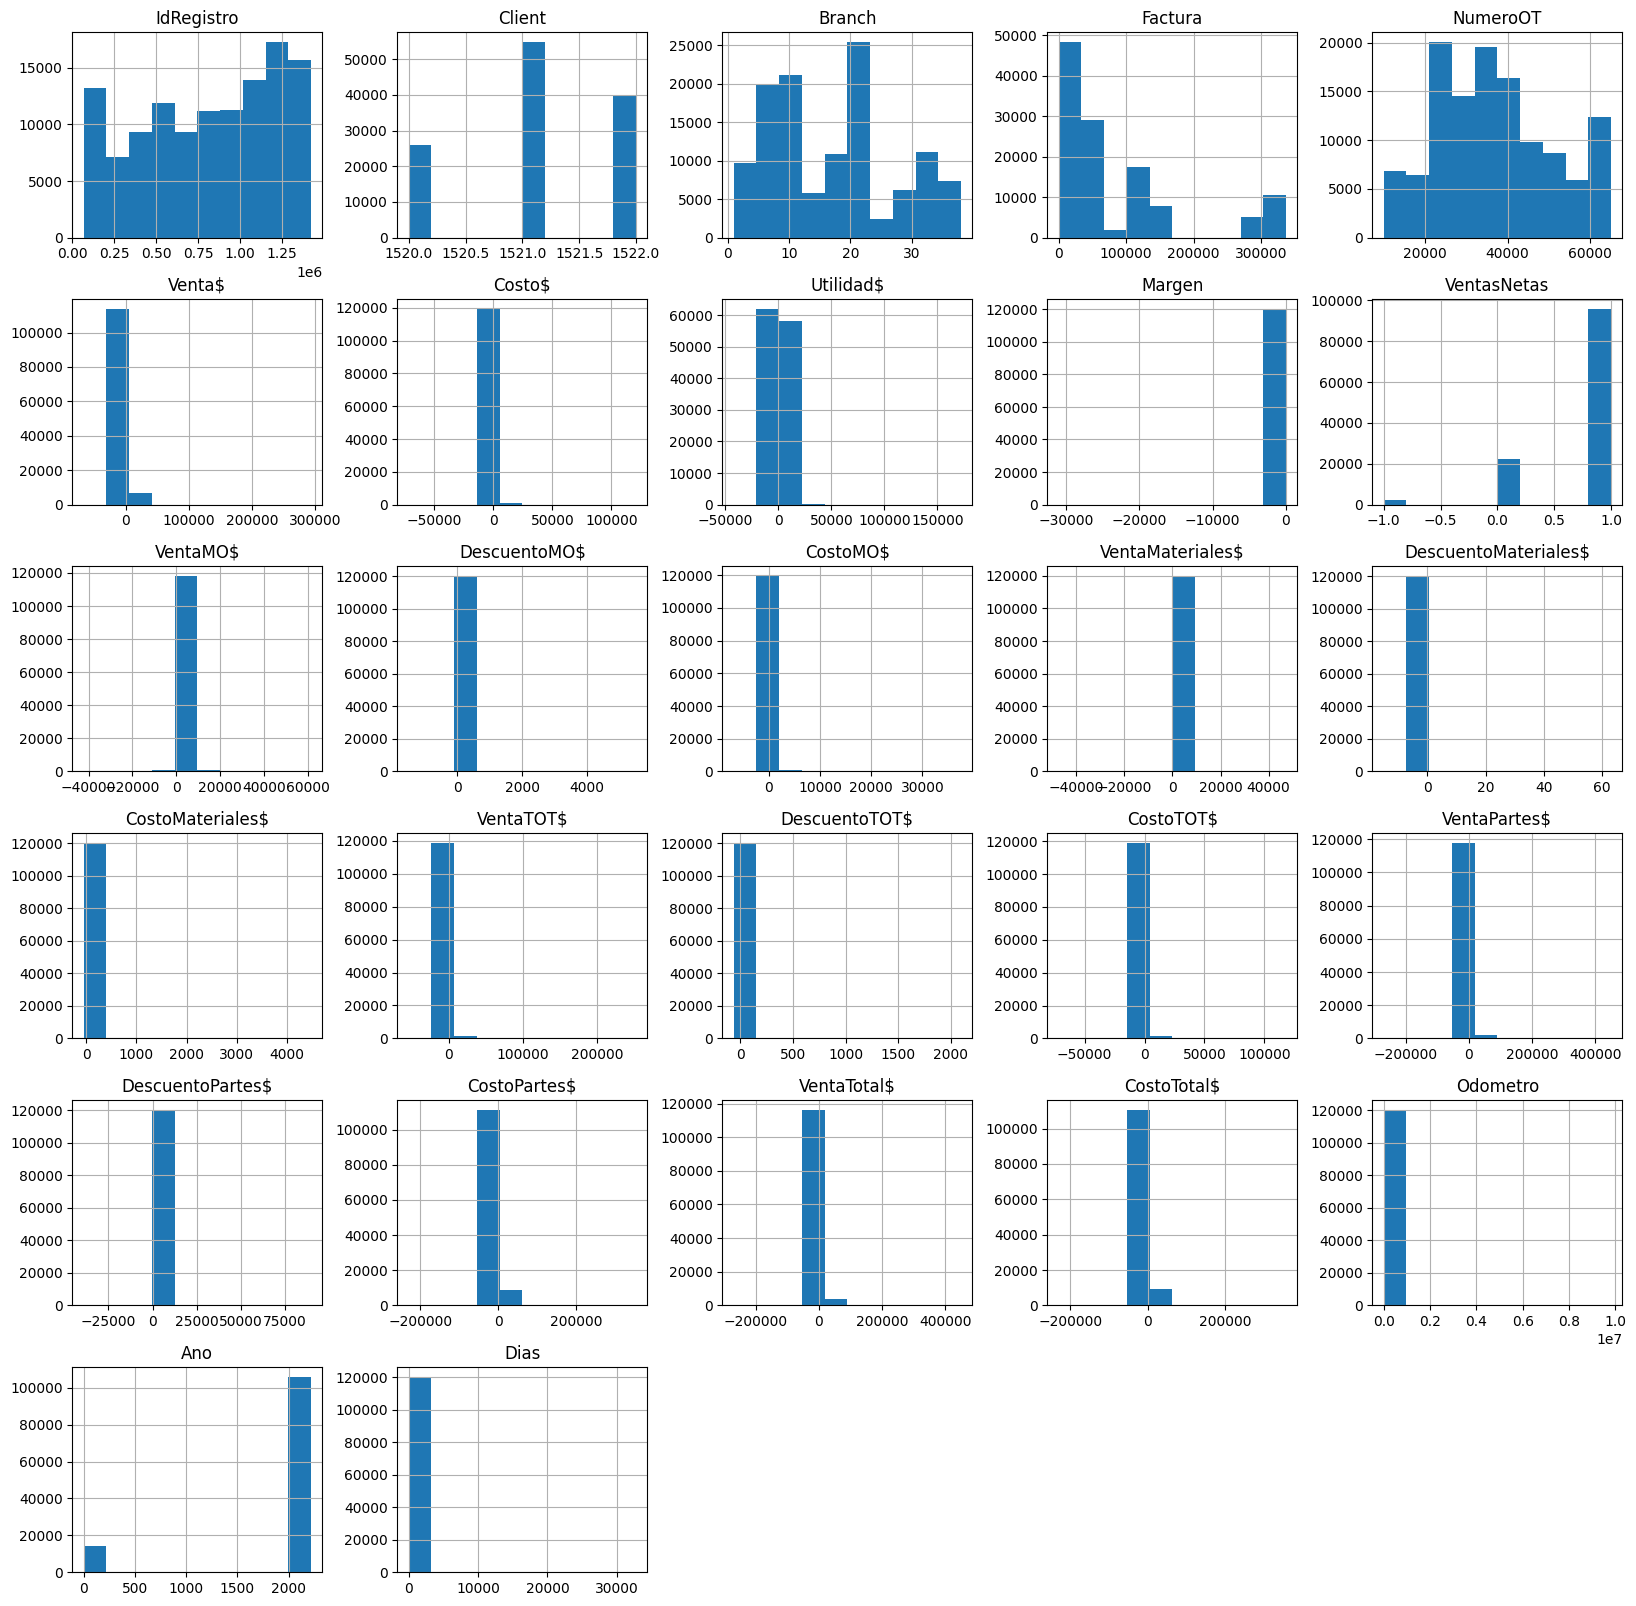

In [46]:
data.hist(figsize=(20,20));

In [47]:
data.describe(exclude='number')

,QPR,FechaFactura,FechaApertura,FechaEntrega,Taller,TipoOrden,TipoPago,Vin,Marca,Color
count,120258,120258,120258,120258,120258,120258,120258,120258,120258,120258
unique,2,174,394,479,4,5,4,73880,25,1404
top,Q2,2021-03-31,2021-04-19,2021-04-30,SERVICIO,PUBLICO,CONTADO,SIN-REGRISTRAR,H,NO-REGRISTRADO
freq,60197,1793,1107,1381,108440,67489,62922,301,24621,21237


In [48]:
data.describe(exclude='number').columns

Index(['QPR', 'FechaFactura', 'FechaApertura', 'FechaEntrega', 'Taller',
       'TipoOrden', 'TipoPago', 'Vin', 'Marca', 'Color'],
      dtype='object')

In [49]:
data.groupby('Taller')['Taller'].count().sort_values()

Taller
HOJALATERIA Y PINTURA INFINITI        52
SERVICIO INFINITI                    396
HOJALATERIA Y PINTURA              11370
SERVICIO                          108440
Name: Taller, dtype: int64

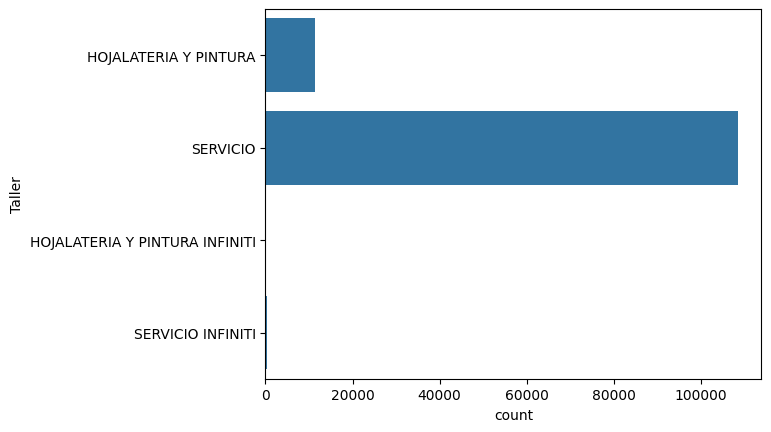

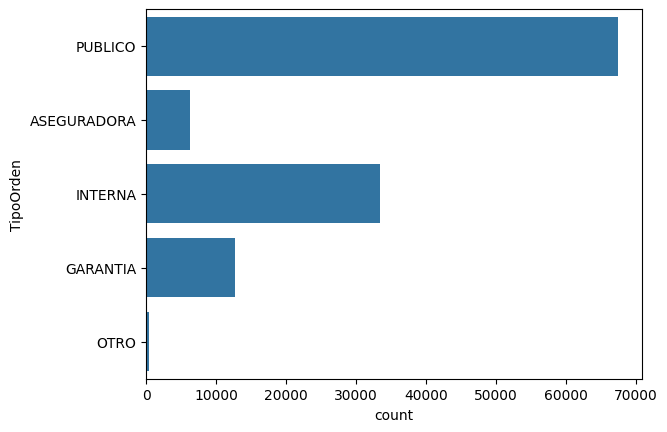

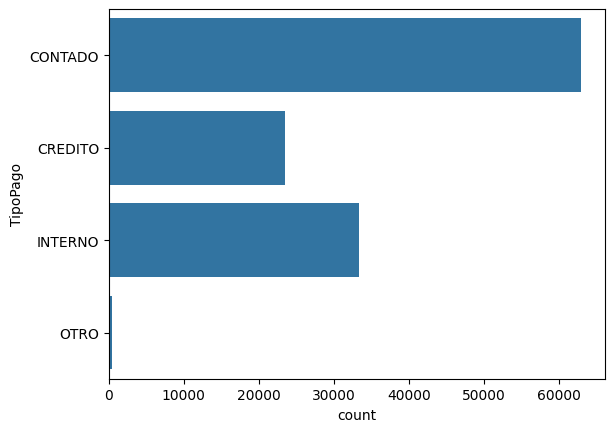

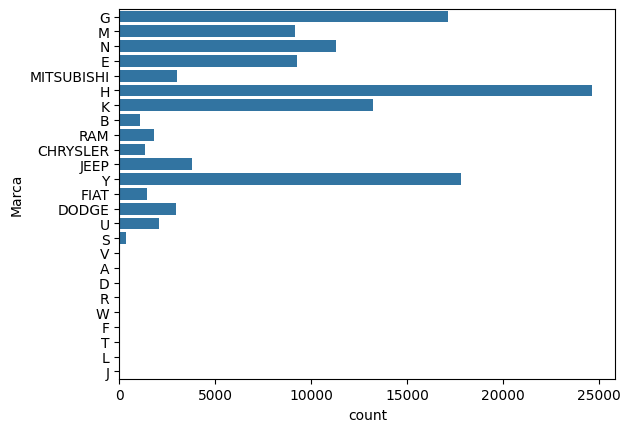

In [50]:
cols = ['Taller', 'TipoOrden', 'TipoPago', 'Marca']
for col in cols:
    sns.countplot(data[col])
    plt.show()

In [51]:
data.groupby('Ano')['Ano'].count()

Ano
0       14312
2           1
201         2
1966        4
1968        1
1980        2
1991        2
1992        4
1993        3
1995        3
1996        2
1997        6
1998       29
1999       10
2000       91
2001       25
2002       59
2003       94
2004       98
2005      194
2006      275
2007      441
2008      532
2009      593
2010      792
2011     1051
2012     1672
2013     2370
2014     3395
2015     4329
2016     7439
2017    10956
2018    17511
2019    19259
2020    19316
2021    15104
2022      276
2029        2
2121        1
2190        1
2218        1
Name: Ano, dtype: int64

In [52]:
data.Ano = data.Ano.replace(2029, 2019)
data.Ano = data.Ano.replace(2190, 2019)
data.Ano = data.Ano.replace(2121, 2021)
data.Ano = data.Ano.replace(2218, 2018)
data.Ano = data.Ano.replace(201, 2010)
data.Ano = data.Ano.replace(2, 2000)

### Parte 1. Análisis de Datos

> ¿Cuántos y cuales VIN´s únicos que visitaron el taller durante el primer trimestre del año, también visitaron el taller al segundo trimestre

In [53]:
data.head(3)

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0


In [54]:
q1_vin_num = data[data.QPR == 'Q1']['Vin'].unique()  # Numero unico de Vin que visitaron el taller en Q1 (Primer trimestre)
print(f'Parece que el numero de Vin in Q1 {len(q1_vin_num)}')

Parece que el numero de Vin in Q1 42020


In [55]:
print('Vin que visitaron el taller en Q1:')
for num in q1_vin_num:
    print(f'Vin => {(num)}')

Vin que visitaron el taller en Q1:
Vin => MMM148ED0EH603267
Vin => 9BD578456GB074512
Vin => 3G1MA5E21ML130621
Vin => MA6CB5CD8LT055964
Vin => 3GNAX9EV8JS506637
Vin => LSGHD54H1JD218256
Vin => LSGHD52H8LD063694
Vin => MA6CB5FD2MT011441
Vin => MA6CC5CD2LT004456
Vin => MA6CB5CDXJT024146
Vin => MA6CB6CD9LT067188
Vin => 3G1J85CC3FS572819
Vin => 3G1J85CC8GS597152
Vin => 3N6AD33A0MK817737
Vin => 3N6AD35A1MK813581
Vin => 3N8CP5HE6JL504518
Vin => JN6BE6CS5F9009630
Vin => MB2C22AC5JM325608
Vin => JN6BE6CS0F9008496
Vin => 3N8CP5HD4LL471769
Vin => 3N1CN7AD7LK414563
Vin => 3N1CK3CD8LL257148
Vin => 3N1AB7AD2JL642087
Vin => 3N1CN8AE4ML860440
Vin => 3N1AB8AE5MY234320
Vin => 3N1CN7AD3JL856232
Vin => 3N1CK3CD3LL229404
Vin => 3N6AD31A2LK877827
Vin => 3N8CP5HE7ML486891
Vin => MALA74NC7HM161392
Vin => 3N1CN8AE1ML859083
Vin => W1X9071551N100378
Vin => 1FADP3F20HL265895
Vin => LSGHD52H5JD176788
Vin => 3GNCJ7CE4HL261874
Vin => 3N1CK3CD6KL201711
Vin => 3N1AB7AD7HL689898
Vin => 3N8CP5HD5LL468282
Vin => 3N1CN7AD

In [56]:
q2_vin_num = data[data.QPR == 'Q2']['Vin'].unique() # # Numero único de Vin que visitaron el taller en Q2 (Primer trimestre)

In [57]:
common_vins = set(q1_vin_num) & set(q2_vin_num)  # Numero de vins que estuvieron en Q1 y Q2

#### Sanity Check

In [58]:
if 'SIN-REGRISTRAR' in q1_vin_num:
    idx = np.where(q1_vin_num == 'SIN-REGRISTRAR')
    print(q1_vin_num[idx])

['SIN-REGRISTRAR']


In [59]:
common_vins.remove('SIN-REGRISTRAR') # Remover el valor del set

In [60]:
# Count Vin values in the set that do not meet the length criteria
incorrect_values = {value for value in common_vins if len(value) != 17}

# Count the number of incorrect values
count_incorrect_values = len(incorrect_values)

print(f"Numbero de Vin con largo incorrecto: {count_incorrect_values}")
print("Valores Incorrectos: ", incorrect_values)

Numbero de Vin con largo incorrecto: 15
Valores Incorrectos:  {'HB070002', '3N1CN7AD3LK40713', '3G1J85CC0F625489', 'HECHOENJAPON', 'MA6CB5CDKT058609', '1.23457E+16', '1.23457E+13', '3N1CND0JL843485', '3GNCJ7CEL223840', 'MA6GG6CD6HB26490', '6F07C251086', '0', 'NOINDICA', 'SN', '3NBC11S19L459322'}


In [61]:
print(f'Numero de Vins que visitaron Q1 y Q2 => {len(common_vins)}')

Numero de Vins que visitaron Q1 y Q2 => 10115


In [62]:
print(f"Vins que visitaron el taller en Q1 and Q2: {', '.join(common_vins)}")

Vins que visitaron el taller en Q1 and Q2: KM8SR4HF3KU296024, 5YFBPRBE3LP144606, 3N1CN7AD5KL875253, 3G1TA5AF5FL201990, 3HGRM3852FG005624, ML3AB26JXKH008088, 3N6AD33A5LK851588, 4JG1668731B237685, 1HGRW1846HL905017, 3N1AB7AD5GL602563, MB2C32AC3KM422854, LSGHD52H9LD056673, 5YFBPRHE3HP602076, JTDKDTB32M1144607, MB2C32AC2KM485251, 3KPF24ADXKE087378, 1C4AJWBG8HL751310, LSGHD54H8KD044431, KL4MM9GL2MB068069, WDD1760431V150888, 9BD197565J3350903, 5KBRL6884LB801369, MB2C32AC2KM540149, 3HGRM3874GG003750, 5YFBPRHE3HP628693, 3N8CP5HEXLL464849, 3MX2476471W011227, LUCGM6661K3103409, MALA75BC3HM482419, 5NPD84AF8HH118218, 1HGRW1894KL912891, LUCGM6664J3108148, ML3AA28J7KH005147, 1C4RJEBG7MC625544, JTDKBRFU1G3018856, LSGHD52H2LD085447, 3KPFJ4B72HE036977, 5YFBPRHE8JP847249, MA6CB6CDXKT006690, 3KPA25AC9JE056161, 3HGRU583XHM013873, MA6CB5CDXJT036054, 3HGRU5831LM008828, 3N8CP5HE8HL481740, 3HGRM4879CG006935, 1HGRW1841KL909693, 1HGRW5830HL902192, WD39076331P186365, TMCJ33A34JJ620458, JE4LD6138GZ054932, MA6CC5C

> Aunque un total 10115 VIN´s únicos visitaron el taller durante el primer trimestre del año, también visitaron el taller al segundo trimestre. 
15 Vin fueron guardados incorrectamente. 

### ¿Cuál es el porcentaje de órdenes de trabajo por Taller para cada Tipo de Orden?

In [64]:
data.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0
3,Q1,2021-03-31,995441,1522,20,2021-03-09,2021-04-01,53848,SERVICIO,INTERNA,INTERNO,59935,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4514,3G1MA5E21ML130621,0,G,NO-REGRISTRADO,22.0
4,Q1,2021-03-31,995442,1522,20,2021-03-13,2021-04-14,114194,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60405,6512.89,2522.00,3990.89,0.61,1,0.0,0.0,0.0,0.0,0.0,0.0,6512.89,0.0,2522.00,21287.43,0.0,17622.71,27800.32,20144.71,21456,MA6CB5CD8LT055964,0,G,NO-REGRISTRADO,18.0


In [65]:
data.Taller.value_counts()

Taller
SERVICIO                          108440
HOJALATERIA Y PINTURA              11370
SERVICIO INFINITI                    396
HOJALATERIA Y PINTURA INFINITI        52
Name: count, dtype: int64

In [66]:
pd.crosstab(data.Taller, data.TipoOrden) # Total

TipoOrden,ASEGURADORA,GARANTIA,INTERNA,OTRO,PUBLICO
Taller,,,,,
HOJALATERIA Y PINTURA,6110,107,2551,295,2307
HOJALATERIA Y PINTURA INFINITI,25,0,12,0,15
SERVICIO,107,12588,30761,135,64849
SERVICIO INFINITI,0,15,63,0,318


In [67]:
pd.crosstab(data.Taller, data.TipoOrden, normalize='all', margins=True, margins_name = 'Total') * 100 # Porcentaje

TipoOrden,ASEGURADORA,GARANTIA,INTERNA,OTRO,PUBLICO,Total
Taller,,,,,,
HOJALATERIA Y PINTURA,5.080743,0.088975,2.121273,0.245306,1.918375,9.454672
HOJALATERIA Y PINTURA INFINITI,0.020789,0.000000,0.009979,0.000000,0.012473,0.043240
SERVICIO,0.088975,10.467495,25.579171,0.112259,53.924895,90.172795
SERVICIO INFINITI,0.000000,0.012473,0.052387,0.000000,0.264431,0.329292
Total,5.190507,10.568943,27.762810,0.357565,56.120175,100.000000


<Axes: ylabel='Taller'>

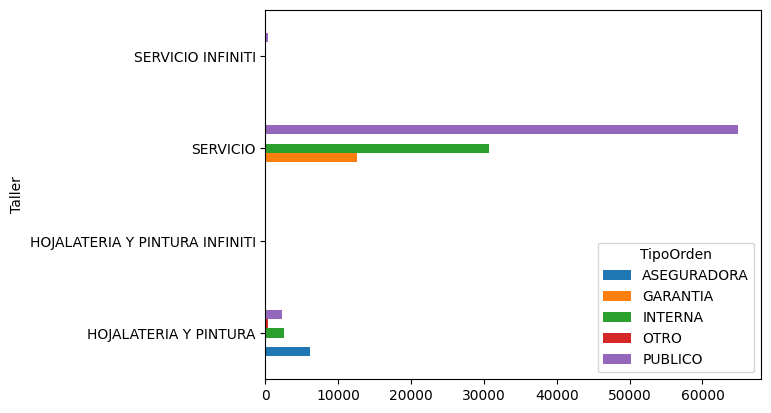

In [68]:
pd.crosstab(data.Taller, data.TipoOrden).plot.barh()

### ¿Qué sucursal tiene un mayor tiempo promedio en la resolución de servicios en cada uno de los meses?

In [69]:
data.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0
3,Q1,2021-03-31,995441,1522,20,2021-03-09,2021-04-01,53848,SERVICIO,INTERNA,INTERNO,59935,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4514,3G1MA5E21ML130621,0,G,NO-REGRISTRADO,22.0
4,Q1,2021-03-31,995442,1522,20,2021-03-13,2021-04-14,114194,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60405,6512.89,2522.00,3990.89,0.61,1,0.0,0.0,0.0,0.0,0.0,0.0,6512.89,0.0,2522.00,21287.43,0.0,17622.71,27800.32,20144.71,21456,MA6CB5CD8LT055964,0,G,NO-REGRISTRADO,18.0


In [70]:
data['FechaFactura'] = pd.to_datetime(data['FechaFactura'])

In [71]:
data['Mes'] = data['FechaFactura'].dt.strftime('%B')

In [72]:
data.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias,Mes
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0,March
3,Q1,2021-03-31,995441,1522,20,2021-03-09,2021-04-01,53848,SERVICIO,INTERNA,INTERNO,59935,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4514,3G1MA5E21ML130621,0,G,NO-REGRISTRADO,22.0,March
4,Q1,2021-03-31,995442,1522,20,2021-03-13,2021-04-14,114194,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60405,6512.89,2522.00,3990.89,0.61,1,0.0,0.0,0.0,0.0,0.0,0.0,6512.89,0.0,2522.00,21287.43,0.0,17622.71,27800.32,20144.71,21456,MA6CB5CD8LT055964,0,G,NO-REGRISTRADO,18.0,March


In [73]:
data[data.Dias > 10000]
data.Dias = data.Dias.replace(32767.0, 18)  # Replace a error en la días. el coche entro el 26 enero y salio 16 febrero 3 semanas menos 3 fines de semana 18 días

In [74]:
resolución_promedio_por_mes = data.groupby(['Mes', 'Branch'])['Dias'].mean()

In [75]:
resolución_promedio_por_mes.loc[resolución_promedio_por_mes.groupby('Mes').idxmax()]

Mes       Branch
April     6         94.000000
February  11        15.816901
January   27        20.031674
June      6         30.000000
March     6         54.981481
May       6         99.428571
Name: Dias, dtype: float64

### ¿Cuál es la sucursal con mayor Margen de Utilidad Bruta en cada uno de los meses?

In [76]:
data.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias,Mes
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0,March
3,Q1,2021-03-31,995441,1522,20,2021-03-09,2021-04-01,53848,SERVICIO,INTERNA,INTERNO,59935,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4514,3G1MA5E21ML130621,0,G,NO-REGRISTRADO,22.0,March
4,Q1,2021-03-31,995442,1522,20,2021-03-13,2021-04-14,114194,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60405,6512.89,2522.00,3990.89,0.61,1,0.0,0.0,0.0,0.0,0.0,0.0,6512.89,0.0,2522.00,21287.43,0.0,17622.71,27800.32,20144.71,21456,MA6CB5CD8LT055964,0,G,NO-REGRISTRADO,18.0,March


$$ \text{Margen de Utilidad Bruta} = \left( \frac{\text{Venta Total} - \text{Costo Total}}{\text{Venta Total}} \right) \times 100 

> Voy a usar la columna Margen para responder esta pregunta, con mas tiempo volvería a checar si el  resultado es el mismo si uso la formula

In [77]:
margen_utilidad_por_mes = data.groupby(['Mes', 'Branch'])['Margen'].mean()

In [78]:
margen_utilidad_por_mes.loc[margen_utilidad_por_mes.groupby('Mes').idxmax()] * 100

Mes       Branch
April     37        78.547945
February  37        79.461538
January   11        78.813462
June      6         82.000000
March     33        76.993392
May       33        75.160784
Name: Margen, dtype: float64

### Elabora un gráfico que permita analizar el Tiket Promedio Total

In [79]:
data.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias,Mes
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0,March
3,Q1,2021-03-31,995441,1522,20,2021-03-09,2021-04-01,53848,SERVICIO,INTERNA,INTERNO,59935,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4514,3G1MA5E21ML130621,0,G,NO-REGRISTRADO,22.0,March
4,Q1,2021-03-31,995442,1522,20,2021-03-13,2021-04-14,114194,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60405,6512.89,2522.00,3990.89,0.61,1,0.0,0.0,0.0,0.0,0.0,0.0,6512.89,0.0,2522.00,21287.43,0.0,17622.71,27800.32,20144.71,21456,MA6CB5CD8LT055964,0,G,NO-REGRISTRADO,18.0,March


> Nota: El ticket promedio (también conocido como «promedio de venta» o «promedio de compra») 
- Cómo calcular el ticket promedio
    - Para calcular el ticket promedio de una empresa o negocio, simplemente debes seguir estos pasos:
        - Suma el total de las ventas realizadas durante un período determinado (por ejemplo, un día, una semana o un mes).
        - Divide esa cantidad por el número total de transacciones realizadas durante ese mismo período.
        - El resultado será el monto promedio que cada cliente gastó en cada transacción.

In [80]:
# Agrupar por fecha y calcular el ticket promedio (VentaTotal$)
ticket_promedio_diario = data.groupby(data['FechaFactura'].dt.date)['VentaTotal$'].mean().reset_index()


In [81]:
ticket_promedio_diario['FechaFactura'] = pd.to_datetime(ticket_promedio_diario['FechaFactura'])

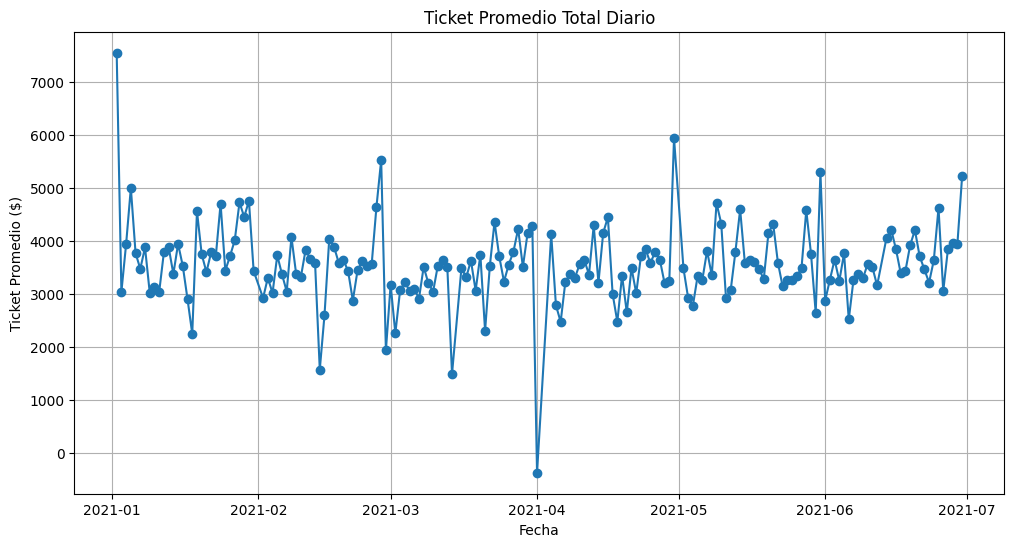

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(ticket_promedio_diario['FechaFactura'], ticket_promedio_diario['VentaTotal$'], marker='o');
plt.title('Ticket Promedio Total Diario')
plt.xlabel('Fecha')
plt.ylabel('Ticket Promedio ($)')
plt.grid(True)
plt.show()

### Elabora un gráfico que permita analizar las ventas por Tipo de Orden

In [83]:
data.TipoOrden.value_counts()

TipoOrden
PUBLICO        67489
INTERNA        33387
GARANTIA       12710
ASEGURADORA     6242
OTRO             430
Name: count, dtype: int64

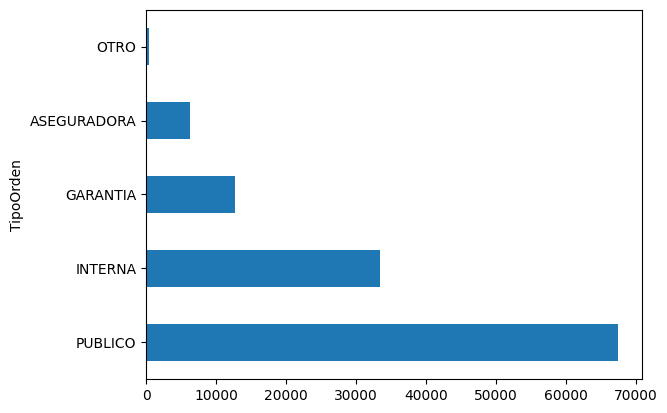

In [84]:
data.TipoOrden.value_counts().plot.barh();

> Sucursal con mayor numero de ordenes por meses?

In [85]:
cantidad_tipo_orden_por_mes = data.groupby(['Mes', 'Branch'])['TipoOrden'].count()

In [86]:
cantidad_tipo_orden_por_mes.loc[cantidad_tipo_orden_por_mes.groupby('Mes').idxmax()]

Mes       Branch
April     12        1634
February  12        1473
January   8         1417
June      12        1622
March     8         1758
May       8         1585
Name: TipoOrden, dtype: int64

<Axes: ylabel='Mes,Branch'>

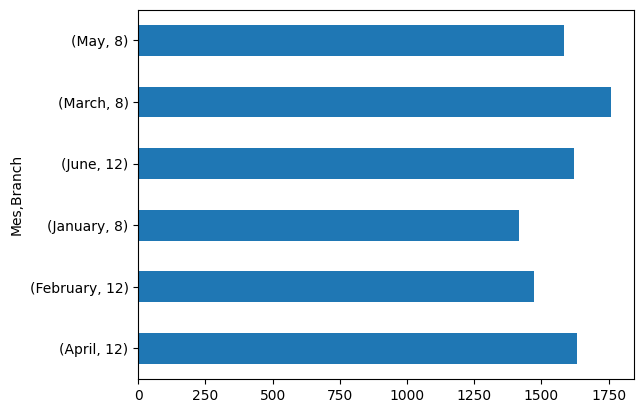

In [87]:
cantidad_tipo_orden_por_mes.loc[cantidad_tipo_orden_por_mes.groupby('Mes').idxmax()].plot.barh()

### Elabora un gráfico que permita analizar las ventas acumuladas por Estado y Sucursal

- Necesito cargar Directorio.csv

In [88]:
directorio = pd.read_csv('Directorio.csv',  encoding = 'ISO-8859-1')

In [89]:
directorio.head()

,Client,Branch,Unnamed: 2,Nombre,Estado
0,1520,1,1520,Sucursal A,Yucatán
1,1520,2,1520,Sucursal B,Yucatán
2,1520,3,1520,Sucursal C,Yucatán
3,1520,5,1520,Sucursal D,Yucatán
4,1521,6,1521,Sucursal E,Yucatán


In [90]:
directorio.drop(columns='Unnamed: 2', inplace=True)

In [91]:
directorio.head()

,Client,Branch,Nombre,Estado
0,1520,1,Sucursal A,Yucatán
1,1520,2,Sucursal B,Yucatán
2,1520,3,Sucursal C,Yucatán
3,1520,5,Sucursal D,Yucatán
4,1521,6,Sucursal E,Yucatán


In [92]:
directorio.Nombre = directorio.Nombre.str.replace(" ", "_")

In [93]:
data.head(3)

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias,Mes
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0,March


#### Merge los datasets

In [94]:
data_merged = pd.merge(data, directorio[['Branch', 'Estado']], on='Branch', how='left')

In [95]:
ventas_acumuladas_estado = data_merged.groupby('Estado')['VentaTotal$'].sum().sort_values(ascending=False)

/tmp/ipykernel_216181/2983779764.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ventas_acumuladas_estado, palette="Spectral")


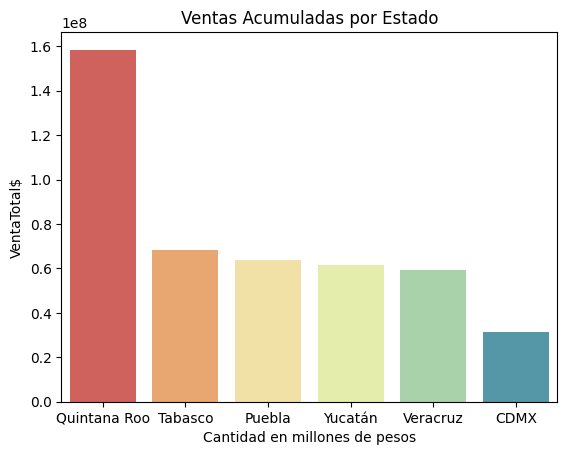

In [96]:
sns.barplot(ventas_acumuladas_estado, palette="Spectral")
plt.title('Ventas Acumuladas por Estado')
plt.xlabel('Cantidad en millones de pesos')
plt.show()

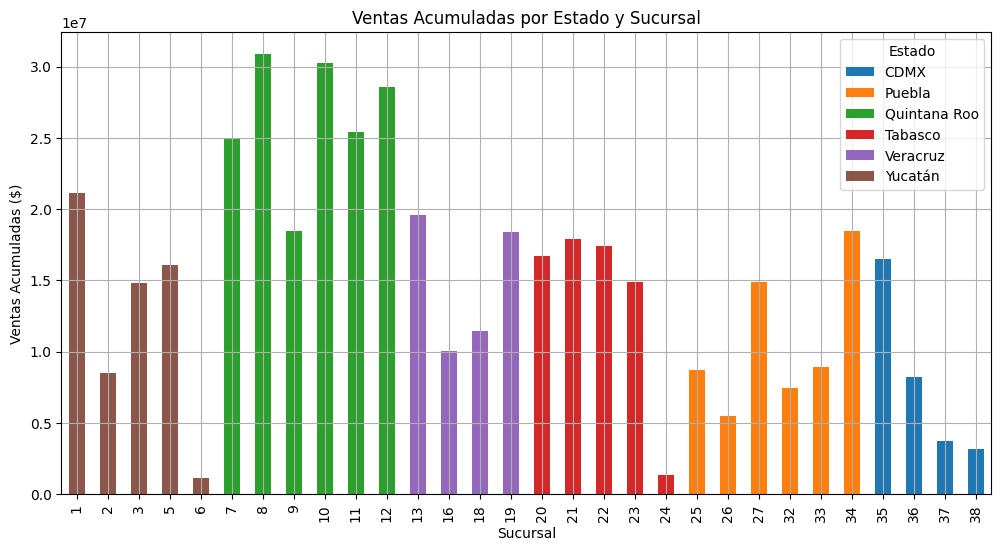

In [97]:
# Agrupar por Estado y Sucursal, y sumar las ventas
ventas_acumuladas = data_merged.groupby(['Estado', 'Branch'])['VentaTotal$'].sum().reset_index()

# Preparar los datos para el gráfico
pivot_ventas = ventas_acumuladas.pivot(index='Branch', columns='Estado', values='VentaTotal$').fillna(0)

# Crear un gráfico de barras apiladas para las ventas acumuladas por Estado y Sucursal
pivot_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Ventas Acumuladas por Estado y Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Ventas Acumuladas ($)')
plt.legend(title='Estado')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Elabora un gráfico que consideres sea de valor para la toma de decisiones y explícalo brevemente.

In [98]:
data_merged.head(3)

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Color,Dias,Mes,Estado
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March,Tabasco
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,CREDITO,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NO-REGRISTRADO,22.0,March,Tabasco
2,Q1,2021-03-31,571394,1521,11,2021-03-31,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,BLANCOS,0.0,March,Quintana Roo


### Comparamos el margen de utilidad bruta con el volumen de ventas

In [99]:
analisis_sucursal = data_merged.groupby('Branch').agg({'Margen': 'mean', 'VentaTotal$': 'sum'}).reset_index()

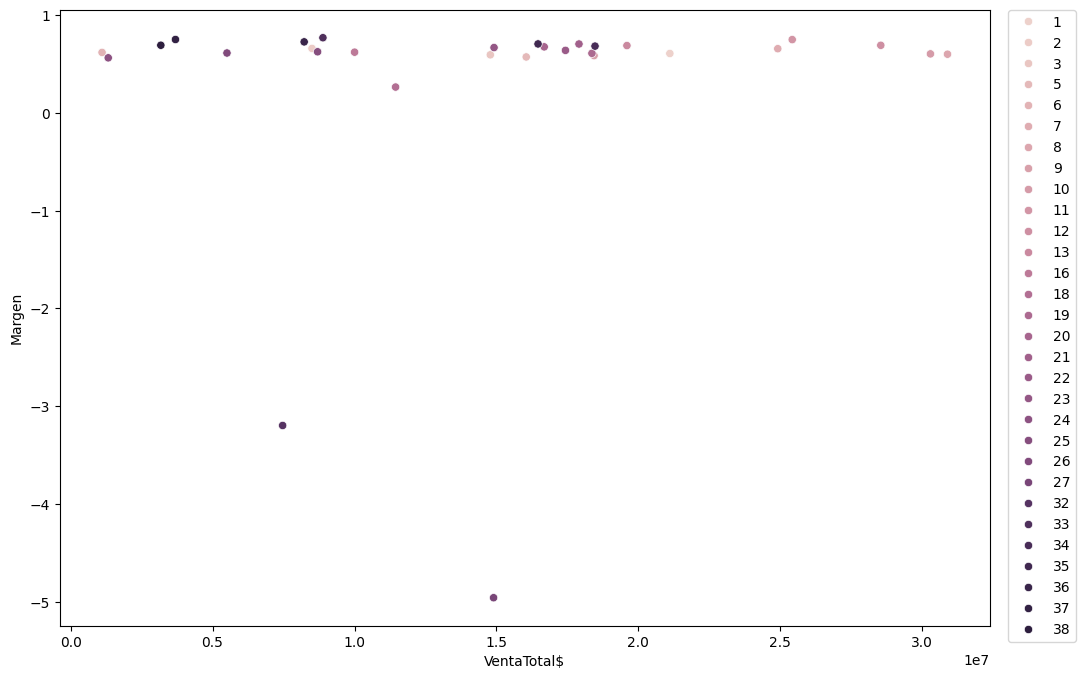

In [100]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='VentaTotal$', y='Margen', data=analisis_sucursal, hue='Branch', legend='full');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Este gráfico es valioso para la toma de decisiones ya que permite identificar:

- Sucursales altamente rentables: Puntos en la parte superior derecha, indicando altas ventas y alto margen de utilidad.
- Sucursales con potencial de mejora: Puntos en la parte inferior derecha, con altas ventas pero margen de utilidad más bajo.
- Sucursales con bajo rendimiento: Puntos en la parte inferior izquierda, indicando bajas ventas y bajo margen de utilidad.

In [101]:
analisis_sucursal.sort_values(['Margen', 'VentaTotal$'],ascending=False).reset_index(drop=True)

,Branch,Margen,VentaTotal$
0,33,0.768851,8887167.39
1,37,0.750692,3693596.25
2,11,0.749617,25416998.68
3,36,0.726419,8226514.87
4,35,0.705325,16463758.87
5,21,0.704665,17906023.68
6,38,0.691974,3178225.48
7,12,0.691334,28536092.40
8,13,0.688650,19594822.86
9,34,0.682978,18470963.34
